In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"sample_data/meteo.csv")

In [3]:
data.head()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,1,2010,6,1,0,0,13.45,77.88,1015.76,0.1,...,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,3,2010,6,3,0,0,14.27,83.58,1016.39,0.0,...,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,5,2010,6,5,0,0,19.88,66.58,1018.18,0.0,...,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,7,2010,6,7,0,0,19.31,72.00,1013.60,0.4,...,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,9,2010,6,9,0,0,22.06,74.29,1005.01,2.0,...,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False


In [4]:
df=data.copy()

In [5]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis = 1)

In [6]:
df=df.drop("Unnamed: 0", axis=1)

In [7]:
df = df.drop("Date", axis = 1)

In [50]:
X = df.drop('pluie.demain', axis=1)
y = df['pluie.demain']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.decomposition import PCA

In [12]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [13]:
pca = PCA(.95)

In [22]:
pca.fit(X_train)
pca.fit(X_test)

PCA(n_components=0.95)

In [23]:
pca.n_components_

17

In [24]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=17))

In [25]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, confusion_matrix, classification_report
def evaluation(model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))


    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[83 35]
 [41 90]]
              precision    recall  f1-score   support

       False       0.67      0.70      0.69       118
        True       0.72      0.69      0.70       131

    accuracy                           0.69       249
   macro avg       0.69      0.70      0.69       249
weighted avg       0.70      0.69      0.69       249



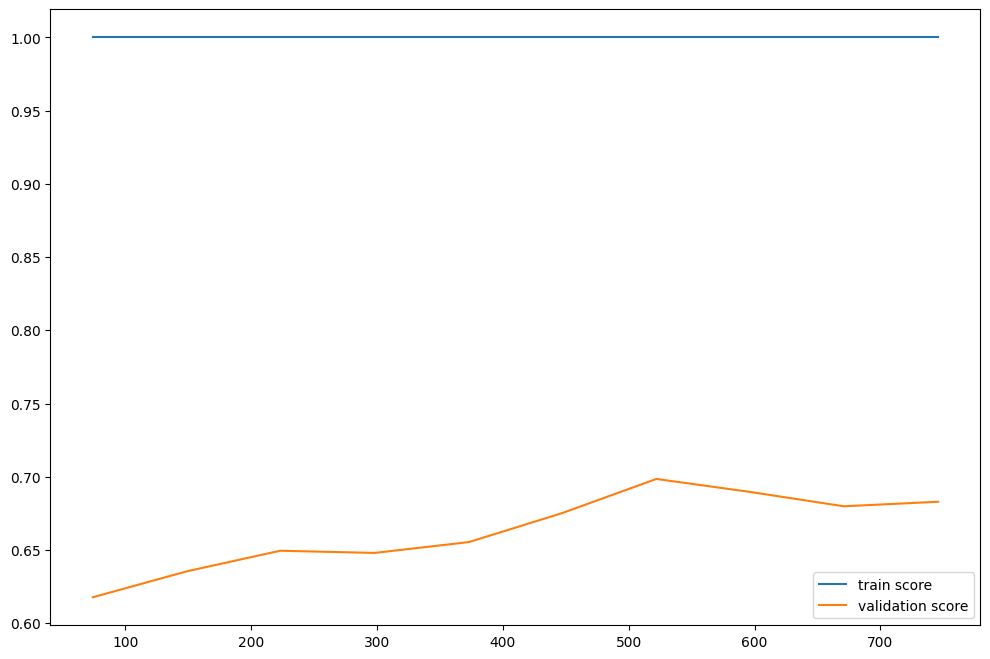

In [27]:
evaluation(RandomForest)

In [28]:
pca_2 = PCA(n_components=2)

In [52]:
P = StandardScaler().fit_transform(X)

In [53]:
P = pca_2.fit_transform(P)

In [54]:
print(P)

[[-0.3061765  -2.26371528]
 [ 0.09698795 -2.42556233]
 [-5.81067144  1.62185979]
 ...
 [ 2.1782839   0.48370475]
 [-2.63532367 -0.89005144]
 [-5.90036942  2.230098  ]]


In [57]:
import pandas as pd
df_acp = pd.DataFrame(data=P, columns=["P1", "P2"])



In [60]:
df_acp.head()

,P1,P2,y
0,-0.306176,-2.263715,True
1,0.096988,-2.425562,False
2,-5.810671,1.621860,True
3,-0.927184,-1.248411,True
4,-0.345243,-1.624261,False


In [59]:
df_acp["y"] = df["pluie.demain"]

[0.9875292]


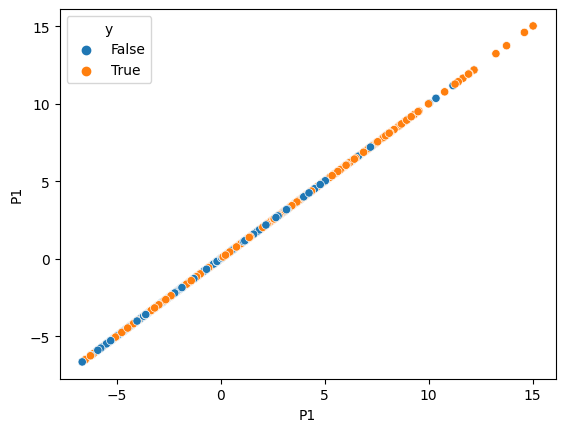

In [65]:
print(pca.explained_variance_ratio_)
sns.scatterplot(x='P1', y='P1', hue= 'y', data= df_acp)
plt.show()